[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


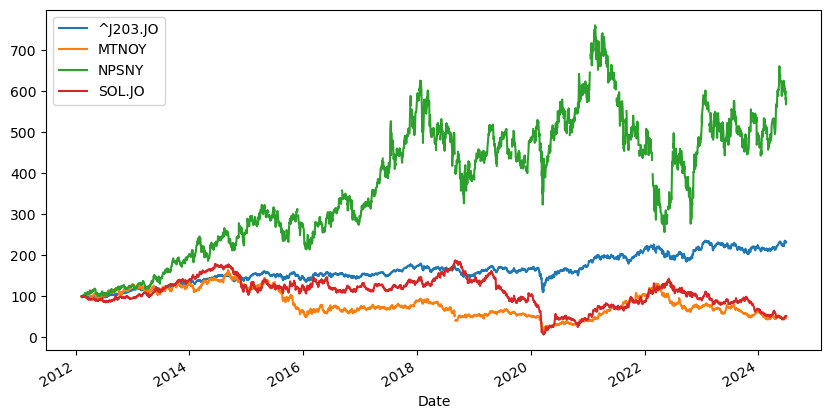

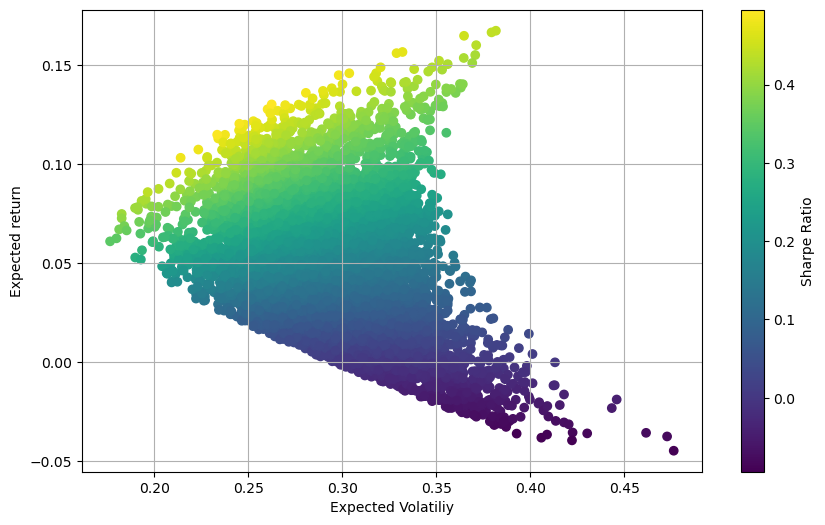

None
Optimal port: [0.607 0.    0.393 0.   ]
Expected return, vol and Sharpe ratio: [0.11793665 0.23593217 0.49987525]
None


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opti
import statistics
import yfinance as yf

stocks = ["^J203.JO", "MTNOY", "NPSNY", "SOL.JO"]
trade_dae = 252
nsims = 10000 #we will use this to generate mutliple portfolios for our efficient frontier
#start and end period
start = "2012-01-01"
end = "2017-01-01"
#lets define a library to retrieve the data
# creeate a dictionary that stores all of our relevant prices
# use yahoo finance to retrieve data
#transform the data into a pandas data frame so that we can be able to plot the relevant data.

def hist_data():
    stock_data = pd.DataFrame()
    for i in stocks:
        stock_data[i] = yf.download(i, start = start)["Adj Close"]
    return stock_data



def plot_data(data):
    (data/data.iloc[0]*100).plot(figsize =(10,5))
    plt.show()

# we need to calculate our returns, we will focus more on log.returns
#data shift ensures that we divide price today with previous day price
#therefore we can expect a nan value in the first row of our returns, we remove this
#log returns normalizes the data, each stock has varying volatility
def daily_returns(data):
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

#we need to calulate the annual expected return and covariances of each stock for
def stats(returns):
    print(returns.mean()*trade_dae)
    print(returns.cov()*trade_dae)

#define mean and variance given the weights

def mean_var_weig(returns, weights):
    portfolio_ret = np.sum(weights * returns.mean())*trade_dae
    portfolio_vol = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*trade_dae, weights)))
    print("expected port mean:", portfolio_ret)
    print("expected port vol:", portfolio_vol)

#we can now generate multiple portfolios for different weights, for our efficient frontier
# to do so successfully, we need to create empty lists of port mean, volatitlity and weights
#we will make use of numpy to achieve this
#it may be required to convert numpy array into pa.Dataframe to plot out efficient frontier

def effecient_front(returns,vol):
    plt.figure(figsize=(10, 6))
    plt.scatter(vol,returns, c= returns/vol, marker='o')
    plt.grid(True)
    plt.xlabel("Expected Volatiliy")
    plt.ylabel("Expected return")
    plt.colorbar(label="Sharpe Ratio")
    plt.show()
def generate_ports(returns):

    port_mean = []
    port_vol = []
    port_weights = []
    #ensure that the sum of the weights is = 1
    for _ in range(nsims):
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        port_weights.append(w)
        port_mean.append(np.sum(returns.mean()*w)*trade_dae)
        port_vol.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*trade_dae, w))))

    return np.array(port_weights), np.array(port_mean), np.array(port_vol)

# NOW which portfolio combination will maximize the the sharpe ratio
#make use of the optimize functions in python
# sharpe ratio = port_ret/port_vol

def stats(w, returns):
    port_ret = np.sum(returns.mean()*w)*trade_dae
    port_vol = np.sqrt(np.dot(w.T,np.dot(returns.cov()*trade_dae, w)))
    return np.array([port_ret, port_vol, port_ret/port_vol])

#make use optimize function, it can return min values
#therefore to ensure that optimize, put - of our function stats
def min_func_sharpe(weights, returns):
    return -stats(weights, returns)[2]

def optim_port(weights, returns):
    constraints = {"type": "eq", "fun": lambda x: np.sum(x)-1} #fun ensures that our weights equal to 1
    bounds = tuple((0,1) for _ in range(len(stocks)))
    return opti.minimize(fun=min_func_sharpe, x0 = weights[0], args = returns, method ="SLSQP", bounds = bounds, constraints = constraints)

#the x in optimum will contain the solution it is not a variable that we have defined
def show_opt_ports(optimum, returns):
    print("Optimal port:", optimum['x'].round(3))
    print("Expected return, vol and Sharpe ratio:", stats(optimum['x'].round(3),returns))

#we can indicate on our efficient frontier which portfolio maximizes our sharpe ratio
def effecient_front_w_opt_port(opt, returns,port_ret,port_vol):
    plt.figure(figsize=(10, 6))
    plt.scatter(port_vol,port_ret, c= port_ret/port_vol, marker='o')
    plt.grid(True)
    plt.xlabel("Expected Volatiliy")
    plt.ylabel("Expected return")
    plt.colorbar(label="Sharpe Ratio")
    plt.plot(stats(opt['x'], returns)[1], stats(opt['x'], returns)[0], "k*", markersize = 2)
    plt.show()

if __name__ == "__main__":
    #print(hist_data())
    data_set = hist_data()
    log_return = (daily_returns(data_set))[1:]
    plot_data(data_set)
    pweights, returns, vol = generate_ports(log_return) #this will return a list of weigts of port and vol
    print(effecient_front(returns, vol))
    optimum = optim_port(pweights, log_return)
    print(show_opt_ports(optimum, log_return))
    #print(effecient_front_w_opt_port(optimum, log_return, returns, vol))

The optimum portfolio is the one that contains 61% of the All Share index (^J203.JO) and 39% of Naspers.

